### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read Image Function

In [2]:
def Read_img(path):
    img= open(path,"r")
    g= img.readline()
    c= img.readline()
    rc= img.readline()
    max= int(img.readline())
    
    [col,row]=[int (i) for i in rc.split()]
    k=np.zeros((row,col),np.int64)  #Arry to store all image pixels
    for i in range (row):
        for j in range(col):
            k[i,j]=img.readline()
    
    img.close()
    plt.imshow(k,cmap='gray')
    return k,g,c,rc,max,col,row

### Store/Write O/p Image Function

In [14]:
def Write_img(path,k,g,c,rc,max,col,row):
    img= open(path,"w")
    img.write(g)
    img.write(c)
    img.write(rc)
    img.write(str(max)+"\n")
    
    for i in range(row):
        for j in range(col):
            img.write("%d\n"%k[i,j])
    plt.imshow(k,cmap='gray')
    img.close()

### Contrast Stretching

In [22]:
def contrast_stretching(arr,row,col):
    min=np.min(arr)
    max=np.max(arr)
    result= np.zeros((row,col),np.int64)
    for i in range(row):
        for j in range(col):
            v= np.rint(255*(arr[i,j]-min)/(max-min))
            result[i,j]=v
    return result

### Thresholding

In [55]:
def find_threshold(arr,row,col,error):
    t=np.mean(arr)
    while(True):
        arr_1d= np.reshape(arr,row*col)
        g1= arr_1d[arr_1d<t]
        g2= arr_1d[arr_1d>t]
        t1= np.rint((np.average(g1)+np.average(g2))/2)
        if (t-t1)<error:
            break
        t=t1
    return t
def thresholding(arr,row,col,error=0.001):
    # t_val=100
    t_val= find_threshold(arr,row,col,error)
    result= np.zeros((row,col),np.int64)
    for i in range(row):
        for j in range(col):
            if arr[i,j]>t_val:
                result[i,j]=255
            else:
                result[i,j]=0
    return result

### Intensity Slicing

In [57]:
def intensity_slicing(arr,row,col):
    result= np.zeros((row,col),np.int64)
    for i in range(row):
        for j in range(col):
            if (arr[i,j]>0 and arr[i,j]<=90) or (arr[i,j]>=100 and arr[i,j]<120):
                result[i,j]=0
            else:
                result[i,j]=arr[i,j]
    return result

### Main Function


Enter 1 to apply contrast stretching
Enter 2 to apply thresholding
Enter 3 to apply intensity slicing
Enter your choice::  3


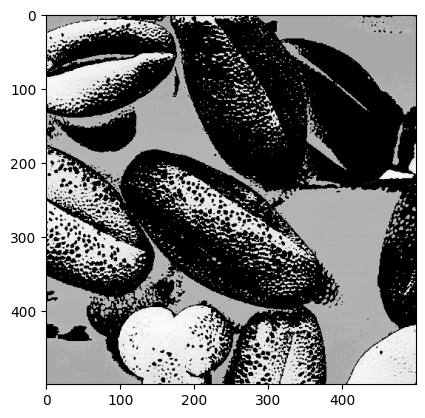

In [59]:
if __name__ == '__main__':
    k1,g1,c1,rc1,max1,col1,row1= Read_img("..\images\DIP3E_Original_Images_CH03\Fig0320(2)(2nd_from_top).pgm")
    
    ch=int(input("\nEnter 1 to apply contrast stretching\nEnter 2 to apply thresholding\nEnter 3 to apply intensity slicing\nEnter your choice:: "))
    if ch==1:
        result=contrast_stretching(k1,row1,col1)
        Write_img("outputs\\contrast_img.pgm",result,g1,c1,rc1,max1,col1,row1)
    elif ch==2:
        result=thresholding(k1,row1,col1)
        Write_img("outputs\\threshold_img.pgm",result,g1,c1,rc1,max1,col1,row1)
    elif ch==3:
        result=intensity_slicing(k1,row1,col1)
        Write_img(f"outputs\\intensity_sliced_img.pgm",result,g1,c1,rc1,max1,col1,row1)
    else :
        print("\nInvalid choice!")

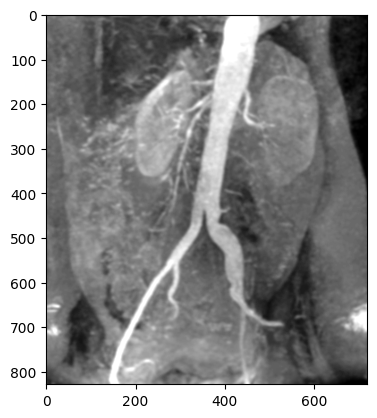

In [60]:
k1,g1,c1,rc1,max1,col1,row1= Read_img("..\images\DIP3E_Original_Images_CH03\Fig0312(a)(kidney).pgm")

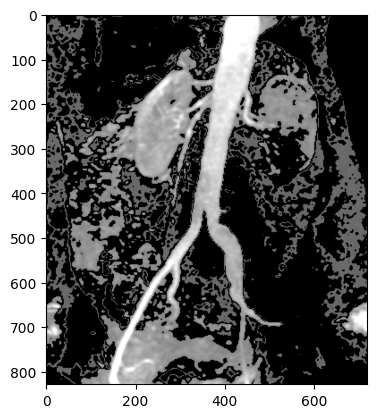

In [63]:
result=intensity_slicing(k1,row1,col1)
plt.imshow(result,cmap='gray')

In [7]:
np.min(k1)

91

In [8]:
np.max(k1)

138

In [31]:
arr=np.array([[1,8,8,0,7],[4,7,9,5,7],[5,4,6,8,6],[4,2,0,1,5],[0,1,0,2,0]])
arr

array([[1, 8, 8, 0, 7],
       [4, 7, 9, 5, 7],
       [5, 4, 6, 8, 6],
       [4, 2, 0, 1, 5],
       [0, 1, 0, 2, 0]])

In [34]:
arr_1d= np.reshape(arr,25)
arr_1d

array([1, 8, 8, 0, 7, 4, 7, 9, 5, 7, 5, 4, 6, 8, 6, 4, 2, 0, 1, 5, 0, 1,
       0, 2, 0])

In [40]:
a= arr_1d[arr_1d>=5]
a

array([8, 8, 7, 7, 9, 5, 7, 5, 6, 8, 6, 5])

In [42]:
np.average(a)

6.75